In [1]:
import pandas as pd
import sklearn
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from lvm_read import read
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn import linear_model, decomposition, preprocessing,metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
caseR=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/sine_sweep.lvm'))
caseH=read(join(os.getcwd(),'Case_H_(+25)/Case_H_(+25)_1/sine_sweep.lvm'))
caseL=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/sine_sweep.lvm'))
caseH[0]['Channel names'].pop()
caseR[0]['Channel names'].pop()
caseL[0]['Channel names'].pop()
dfR=pd.DataFrame(caseR[0]['data'],columns=caseR[0]['Channel names'])
dfH=pd.DataFrame(caseH[0]['data'],columns=caseH[0]['Channel names'])
dfL=pd.DataFrame(caseL[0]['data'],columns=caseL[0]['Channel names'])
NH,Chno=dfH.shape
NR,Chno=dfR.shape
NL,Chno=dfL.shape
yh=NH*['H']
yr=NR*['R']
yl=NL*['L']
df=pd.concat([dfR,pd.DataFrame({'target':yr})],axis=1)
df=df.append([pd.concat([dfL,pd.DataFrame({'target':yl})],axis=1),pd.concat([dfH,pd.DataFrame({'target':yh})],axis=1)])


/var/folders/td/db5gpbnn15s7f867jp3scyhh0000gn/T/ipykernel_93809/2729094387.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([pd.concat([dfL,pd.DataFrame({'target':yl})],axis=1),pd.concat([dfH,pd.DataFrame({'target':yh})],axis=1)])


In [3]:
N,Chno=dfH.shape
Ts = 6 * 1e-4 # sampling time
timeR = (np.linspace(1,NR,NR) - 1) * Ts
timeL = (np.linspace(1,NL,NL) - 1) * Ts
timeH = (np.linspace(1,NH,NH) - 1) * Ts
sample_rate=1666 #Hertz

Ch1 = df['force']  # célula de carga: força do shakerH
Ch2 = df['Ch1'] # 
Ch3 = df['Ch2'] # 
Ch4 = df['Ch3'] # 
Ch5 = df['Ch4'] # 
Ch6 = df['Ch5'] # 
Ch7 = df['Ch6'] # 
Ch8 = df['Ch7'] # 
Ch9 = df['Ch8'] # 

HCh1 = dfH['force']  # célula de carga: força do shakerH
HCh2 = dfH['Ch1'] # 
HCh3 = dfH['Ch2'] # 
HCh4 = dfH['Ch3'] # 
HCh5 = dfH['Ch4'] # 
HCh6 = dfH['Ch5'] # 
HCh7 = dfH['Ch6'] # 
HCh8 = dfH['Ch7'] # 
HCh9 = dfH['Ch8'] # 

RCh1 = dfR['force']  # célula de carga: força do shakerH
RCh2 = dfR['Ch1'] # 
RCh3 = dfR['Ch2'] # 
RCh4 = dfR['Ch3'] # 
RCh5 = dfR['Ch4'] # 
RCh6 = dfR['Ch5'] # 
RCh7 = dfR['Ch6'] # 
RCh8 = dfR['Ch7'] # 
RCh9 = dfR['Ch8'] # 

LCh1 = dfL['force']  # célula de carga: força do shakerH
LCh2 = dfL['Ch1'] # 
LCh3 = dfL['Ch2'] # 
LCh4 = dfL['Ch3'] # 
LCh5 = dfL['Ch4'] # 
LCh6 = dfL['Ch5'] # 
LCh7 = dfL['Ch6'] # 
LCh8 = dfL['Ch7'] # 
LCh9 = dfL['Ch8'] #

# Análise Exploratória

In [4]:
dfR.describe()
dfH.describe()
dfL.describe()

,X_Value,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,K7861_H,...,Strain_16_temp_comp,Strain_17_rosette_A,Strain_18_rosette_B,Strain_19_rosette_C,Strain_20_rosette_A,Strain_21_rosette_B,Strain_22_rosette_C,Strain_23,Strain_24,Strain_16_temp_comp (Filtered)
count,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,...,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,213248.000000,2.132480e+05,2.132480e+05,2.132480e+05
mean,63.974100,0.001093,0.001367,0.000536,0.002219,0.001341,0.002174,0.000117,0.002481,5.457665,...,-0.000002,-0.000002,-0.000004,-0.000003,-0.000003,-0.000003,-0.000003,-8.559082e-07,-1.037978e-06,-1.746595e-06
std,36.935724,0.774969,0.640226,0.592625,0.733730,0.963615,0.878701,1.027171,1.025689,0.020476,...,0.000006,0.000003,0.000003,0.000002,0.000002,0.000003,0.000002,3.818726e-06,4.220667e-06,1.094775e-06
min,0.000000,-4.702410,-4.342678,-4.205424,-6.593449,-7.142179,-5.581568,-7.599172,-7.153694,5.417672,...,-0.000014,-0.000017,-0.000024,-0.000017,-0.000013,-0.000027,-0.000015,-4.721727e-05,-4.819763e-05,-3.713499e-06
25%,31.987050,-0.103091,-0.164605,-0.113804,-0.137735,-0.292201,-0.232830,-0.242497,-0.335813,5.440887,...,-0.000008,-0.000004,-0.000005,-0.000004,-0.000004,-0.000004,-0.000004,-1.902316e-06,-2.183968e-06,-2.827353e-06
50%,63.974100,0.003500,-0.000696,0.002415,-0.007856,-0.002402,-0.006412,0.009774,-0.014567,5.456007,...,-0.000002,-0.000002,-0.000004,-0.000003,-0.000003,-0.000003,-0.000003,-8.679661e-07,-1.064269e-06,-1.747689e-06
75%,95.961150,0.105615,0.175029,0.118062,0.148772,0.305497,0.253650,0.251847,0.358961,5.474767,...,0.000004,-0.000001,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,1.956625e-07,7.496504e-08,-6.656419e-07
max,127.948200,4.563173,4.125222,4.001911,6.055963,6.736236,5.212644,7.931403,6.355561,5.499813,...,0.000010,0.000012,0.000018,0.000011,0.000007,0.000020,0.000009,4.328159e-05,4.924639e-05,2.942650e-07


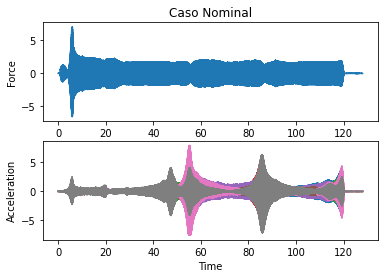

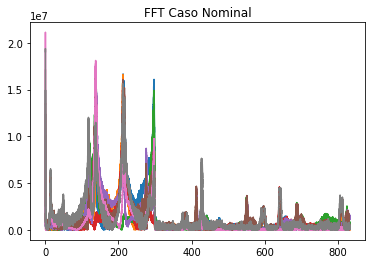

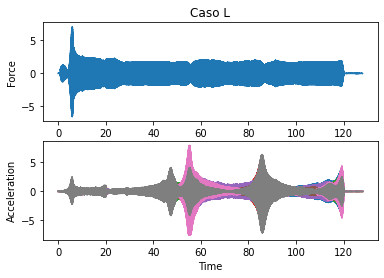

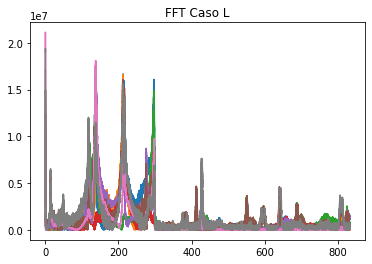

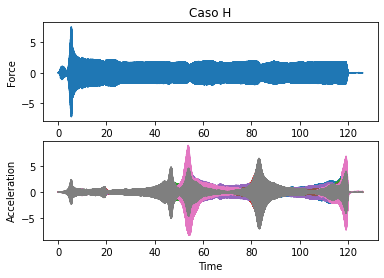

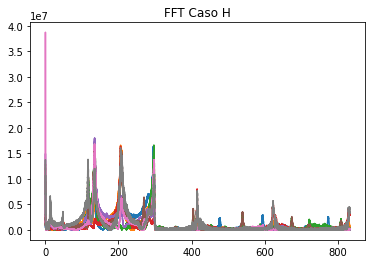

In [5]:

#rnorm1 = np.int16((RCh1 / RCh1.max()) * 32767)
rnorm2 = np.int16((RCh2 / RCh2.max()) * 32767)
rnorm3 = np.int16((RCh3 / RCh3.max()) * 32767)
rnorm4 = np.int16((RCh4 / RCh4.max()) * 32767)
rnorm5 = np.int16((RCh5 / RCh5.max()) * 32767)
rnorm6 = np.int16((RCh6 / RCh6.max()) * 32767)
rnorm7 = np.int16((RCh7 / RCh7.max()) * 32767)
rnorm8 = np.int16((RCh8 / RCh8.max()) * 32767)
rnorm9 = np.int16((RCh9 / RCh9.max()) * 32767)

hnorm2 = np.int16((HCh2 / HCh2.max()) * 32767)
hnorm3 = np.int16((HCh3 / HCh3.max()) * 32767)
hnorm4 = np.int16((HCh4 / HCh4.max()) * 32767)
hnorm5 = np.int16((HCh5 / HCh5.max()) * 32767)
hnorm6 = np.int16((HCh6 / HCh6.max()) * 32767)
hnorm7 = np.int16((HCh7 / HCh7.max()) * 32767)
hnorm8 = np.int16((HCh8 / HCh8.max()) * 32767)
hnorm9 = np.int16((HCh9 / HCh9.max()) * 32767)

lnorm2 = np.int16((LCh2 / LCh2.max()) * 32767)
lnorm3 = np.int16((LCh3 / LCh3.max()) * 32767)
lnorm4 = np.int16((LCh4 / LCh4.max()) * 32767)
lnorm5 = np.int16((LCh5 / LCh5.max()) * 32767)
lnorm6 = np.int16((LCh6 / LCh6.max()) * 32767)
lnorm7 = np.int16((LCh7 / LCh7.max()) * 32767)
lnorm8 = np.int16((LCh8 / LCh8.max()) * 32767)
lnorm9 = np.int16((LCh9 / LCh9.max()) * 32767)

xfR = rfftfreq(NR, 1 / sample_rate)
xfL = rfftfreq(NL, 1 / sample_rate)
xfH = rfftfreq(NH, 1 / sample_rate)

rf2 = rfft(rnorm2)
rf3 = rfft(rnorm3)
rf4 = rfft(rnorm4)
rf5 = rfft(rnorm5)
rf6 = rfft(rnorm6)
rf7 = rfft(rnorm7)
rf8 = rfft(rnorm8)
rf9 = rfft(rnorm9)

hf2 = rfft(hnorm2)
hf3 = rfft(hnorm3)
hf4 = rfft(hnorm4)
hf5 = rfft(hnorm5)
hf6 = rfft(hnorm6)
hf7 = rfft(hnorm7)
hf8 = rfft(hnorm8)
hf9 = rfft(hnorm9)

lf2 = rfft(lnorm2)
lf3 = rfft(lnorm3)
lf4 = rfft(lnorm4)
lf5 = rfft(lnorm5)
lf6 = rfft(lnorm6)
lf7 = rfft(lnorm7)
lf8 = rfft(lnorm8)
lf9 = rfft(lnorm9)

plt.figure()
plt.subplot(211)
plt.title('Caso Nominal')
plt.plot(timeR,RCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(timeR,RCh2,timeR,RCh3,timeR,RCh4,timeR,RCh5,timeR,RCh6,timeR,RCh7,timeR,RCh8,timeR,RCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.plot(xfR, np.abs(rf2),xfR, np.abs(rf3),xfR, np.abs(rf4),xfR, np.abs(rf5),xfR, np.abs(rf6),xfR, np.abs(rf7),xfR, np.abs(rf8),xfR, np.abs(rf9))
plt.title('FFT Caso Nominal')
plt.show()

# obs: depois mudar o nome do caso
plt.figure()
plt.subplot(211)
plt.title('Caso L')
plt.plot(timeL,LCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(timeL,LCh2,timeL,LCh3,timeL,LCh4,timeL,LCh5,timeL,LCh6,timeL,LCh7,timeL,LCh8,timeL,LCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.plot(xfL, np.abs(lf2),xfL, np.abs(lf3),xfL, np.abs(lf4),xfL, np.abs(lf5),xfL, np.abs(lf6),xfL, np.abs(lf7),xfL, np.abs(lf8),xfL, np.abs(lf9))
plt.title('FFT Caso L')
plt.show()

# obs: depois mudar o nome do caso
plt.figure()
plt.subplot(211)
plt.title('Caso H')
plt.plot(timeH,HCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(timeH,HCh2,timeH,HCh3,timeH,HCh4,timeH,HCh5,timeH,HCh6,timeH,HCh7,timeH,HCh8,timeH,HCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.plot(xfH, np.abs(hf2),xfH, np.abs(hf3),xfH, np.abs(hf4),xfH, np.abs(hf5),xfH, np.abs(hf6),xfH, np.abs(hf7),xfH, np.abs(hf8),xfH, np.abs(hf9))
plt.title('FFT Caso H')
plt.show()

# Extração de Características

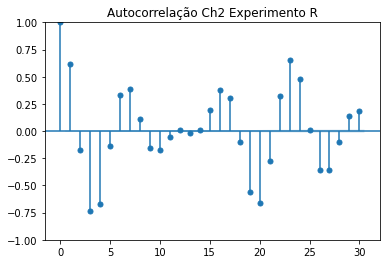

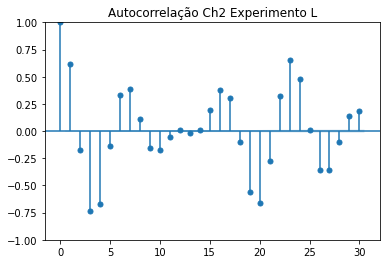

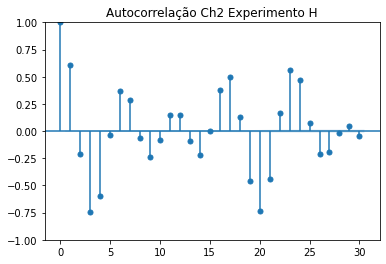

In [6]:
tsaplots.plot_acf(RCh2, lags=30,title='Autocorrelação Ch2 Experimento R')
tsaplots.plot_acf(LCh2, lags=30,title='Autocorrelação Ch2 Experimento L')
tsaplots.plot_acf(HCh2, lags=30,title='Autocorrelação Ch2 Experimento H')

plt.show()

In [7]:
AR=[]
RAR2 = AutoReg(RCh2, lags = 30).fit()
RAR3 = AutoReg(RCh3, lags = 30).fit()
RAR4 = AutoReg(RCh4, lags = 30).fit()
RAR5 = AutoReg(RCh5, lags = 30).fit()
RAR6 = AutoReg(RCh6, lags = 30).fit()
RAR7 = AutoReg(RCh7, lags = 30).fit()
RAR8 = AutoReg(RCh8, lags = 30).fit()
RAR9 = AutoReg(RCh9, lags = 30).fit()
RAR=np.concatenate([RAR2.params,RAR3.params,RAR4.params,RAR5.params,RAR6.params,RAR7.params,RAR8.params,RAR9.params])
AR.append(RAR)
LAR2 = AutoReg(LCh2, lags = 30).fit()
LAR3 = AutoReg(LCh3, lags = 30).fit()
LAR4 = AutoReg(LCh4, lags = 30).fit()
LAR5 = AutoReg(LCh5, lags = 30).fit()
LAR6 = AutoReg(LCh6, lags = 30).fit()
LAR7 = AutoReg(LCh7, lags = 30).fit()
LAR8 = AutoReg(LCh8, lags = 30).fit()
LAR9 = AutoReg(LCh9, lags = 30).fit()
LAR=np.concatenate([LAR2.params,LAR3.params,LAR4.params,LAR5.params,LAR6.params,LAR7.params,LAR8.params,LAR9.params])
AR.append(LAR)
HAR2 = AutoReg(HCh2, lags = 30).fit()
HAR3 = AutoReg(HCh3, lags = 30).fit()
HAR4 = AutoReg(HCh4, lags = 30).fit()
HAR5 = AutoReg(HCh5, lags = 30).fit()
HAR6 = AutoReg(HCh6, lags = 30).fit()
HAR7 = AutoReg(HCh7, lags = 30).fit()
HAR8 = AutoReg(HCh8, lags = 30).fit()
HAR9 = AutoReg(HCh9, lags = 30).fit()
HAR=np.concatenate([HAR2.params,HAR3.params,HAR4.params,HAR5.params,HAR6.params,HAR7.params,HAR8.params,HAR9.params])
AR.append(HAR)

In [8]:
pca = decomposition.PCA(n_components=0.97) #variancia explicada 97%
PCA = pca.fit_transform(AR)
Nc,PCAcomp=PCA.shape 
PCAcomp

1